# SPRAWOZDANIE 4

Katarzyna Nyznar
297260

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from math import *
import numpy
from scipy.interpolate import interp1d
import mpmath
from scipy.interpolate import lagrange
import scipy.misc

# Zadanie 1

In [24]:
def lagrange(x, y):
    def f(a):
        sum=0
        for i in range(len(x)):
            t=1
            for j in range(len(x)):
                if(j!=i):
                    t=t*(a-x[j])/(x[i]-x[j])
            sum += (y[i]*t)
        return sum
    return f


# Zadanie 2

C:\Users\katarzyna.nyznar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
C:\Users\katarzyna.nyznar\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  


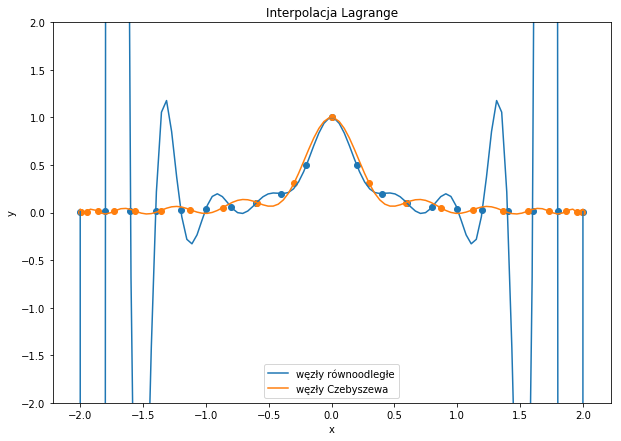

In [25]:
def f(x):
    return 1/(25*x*x+1)

start = -2
end = 2
n = 21

rownoodlegleX = np.linspace(start, end, n)
rownoodlegleLagrange = np.poly1d(np.polyfit(rownoodlegleX, f(rownoodlegleX), n))
xp = np.linspace(start, end, 100)

czebyszewX_1 = [2*cos((2*m-1)/(2*n)*pi) for m in range(1, n+1)]
czebyszewX = np.array(czebyszewX_1)
czebyszewLagrange = np.poly1d(np.polyfit(czebyszewX, f(czebyszewX), n))

plt.figure(figsize=(10,7))
plt.scatter(rownoodlegleX, f(rownoodlegleX))
plt.plot(xp, rownoodlegleLagrange(xp), label="węzły równoodległe")
plt.scatter(czebyszewX, f(czebyszewX))
plt.plot(xp, czebyszewLagrange(xp), label="węzły Czebyszewa")
plt.ylim(-2, 2)
plt.title('Interpolacja Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

W przypadku stałych odległości węzłów jakość interpolacji wielomianem pozostawia wiele do życzenia. Początkowo wraz ze wzrostem liczby węzłów przybliżenie poprawia się, jednak po dalszym wzroście ich liczby, 
zaczyna się na powrót pogarszać. Jest to szczególnie widoczne na krańcach przedziałów. Lepiej w tym przypadku sprawdziły się
węzły Czebyszewa, które są zagęszczone na krańcach przedziałów, dzięki czemu interpolacja zwraca dokładniejszy wynik.

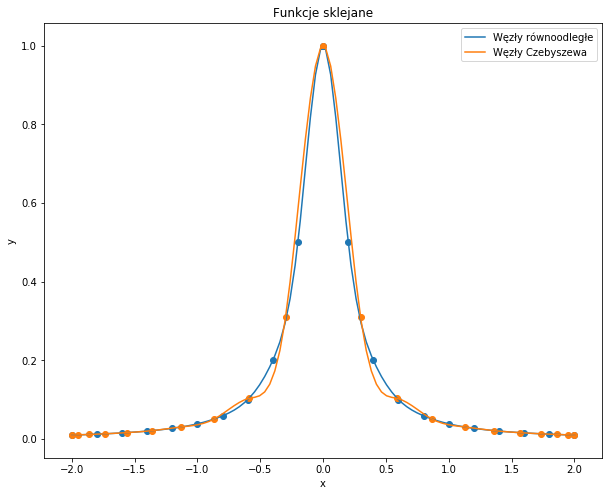

In [26]:
rownoodlegleSklejone = interpolate.interp1d(rownoodlegleX, f(rownoodlegleX), 3, fill_value='extrapolate')
czebyszewSklejone  = interpolate.interp1d(czebyszewX, f(czebyszewX), 3, fill_value='extrapolate')
                              
plt.figure(figsize=(10,8))
plt.scatter(rownoodlegleX, f(rownoodlegleX))                       
plt.plot(xp, rownoodlegleSklejone(xp), label='Węzły równoodległe')
plt.scatter(czebyszewX, f(czebyszewX))
plt.plot(xp, czebyszewSklejone(xp), label='Węzły Czebyszewa')
plt.title('Funkcje sklejane')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Zadanie 3

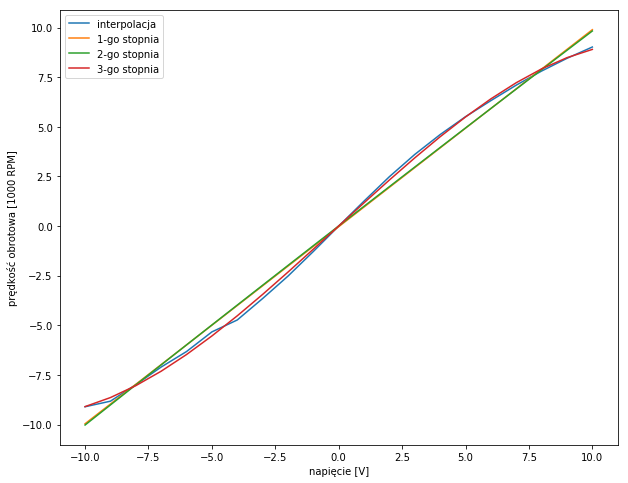

In [27]:
napiecie = [i for i in range(-10,11)]
predkosc = [-9.10,-8.82,-7.99,-7.10,-6.32,-5.33,-4.73,-3.65,-2.52,-1.28,0.00,1.26,2.49,3.61,4.61,5.51,6.32,7.10,7.81,8.45,9.02]

interpolate = interpolate.interp1d(napiecie, predkosc)

poly1 = np.polyfit(napiecie,predkosc,deg=1) 
p1 = np.poly1d(poly1)
poly2 = np.polyfit(napiecie,predkosc,deg=2)
p2 = np.poly1d(poly2)
poly3 = np.polyfit(napiecie,predkosc,deg=3)
p3 = np.poly1d(poly3)


plt.figure(figsize=(10,8))
plt.plot(napiecie, interpolate(napiecie), label='interpolacja')
plt.plot(napiecie, p1(napiecie),label='1-go stopnia')
plt.plot(napiecie, p2(napiecie),label='2-go stopnia')
plt.plot(napiecie, p3(napiecie), label='3-go stopnia')
plt.xlabel('napięcie [V]')
plt.ylabel('prędkość obrotowa [1000 RPM]')
plt.legend(loc='upper left')
plt.show()


Najbardziej zbliżony przebiego do interpolacji wielomianowej ma aproksymacja 3 stopnia

# Zadanie 4

Samochód minął radar po  2.28 s.
W trakcie mijania fotoradaru jechał z prędkością: 77.89 km/h


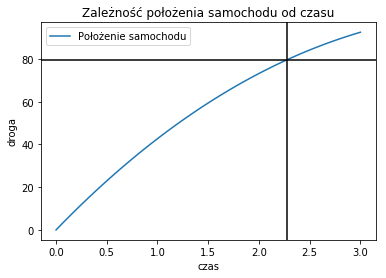

In [31]:
t = [0.0, 1.0, 2.0, 3.0]
s = [0.0, 42.7, 73.2, 92.5]
radar = 79.6

czas = np.roots(lagrange(t,s) - radar)

for i in range(len(czas)):
    if(czas[i] >= 0 and czas[i] <= 3):
        czas_miniecia = round(czas[i], 2)
        
predkosc_miniecia = mpmath.diff(lagrange(t,s), czas_miniecia) #predkosc w m/s
predkosc_miniecia = round((predkosc_miniecia * 36/10), 2) #predkosc w km/h

print("Samochód minął radar po ", czas_miniecia, "s.")
print("W trakcie mijania fotoradaru jechał z prędkością:", predkosc_miniecia, "km/h")

x = np.linspace(0,3,100)
plt.plot(x, lagrange(t,s)(x), label = "Położenie samochodu")
plt.axvline(czas_miniecia, color='black')
plt.axhline(radar, color='black')
plt.xlabel("czas")
plt.ylabel("droga")
plt.title("Zależność położenia samochodu od czasu")
plt.legend()
plt.show()